# This notebook relies on the Coursera Course "Deep Learning and Neural Networks" week 4 jupyter notebook from deeplearning.ai. Please enroll into the course and download the "Deep Neural Network - Application" and "dnn_app_utils_v2.py" files and insert the L_layer_model code.

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import h5py
import matplotlib.pyplot as plt

# DOWNLOAD AND IMPORT dnn_app_utils-v2 FILE FROM COURSERA
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
   ### INSERT CODE FROM COURSERA HERE
   ### INSERT CODE FROM COURSERA HERE
   ### INSERT CODE FROM COURSERA HERE
   ### INSERT CODE FROM COURSERA HERE
   ### INSERT CODE FROM COURSERA HERE
    
    return parameters

# Train Neural Net on Titanic Survival data set

## Read training data

In [3]:
train = pd.read_csv('datasets/titanic_train.csv')

## Preprocess the data

### Impute passenger age based on class

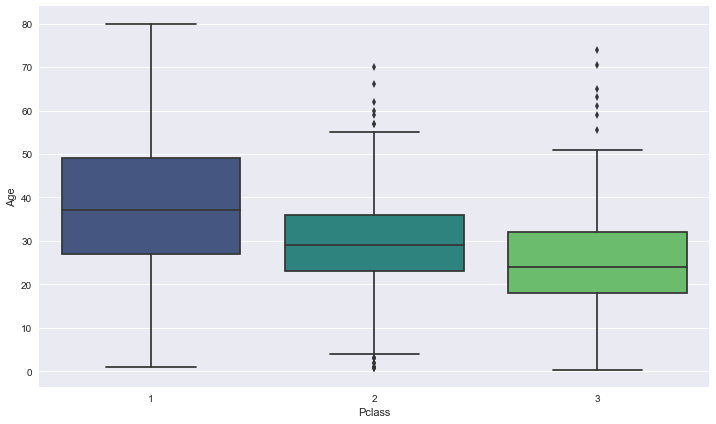

In [4]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='viridis')

### We can see that older passengers tend to be in class 1, while younger passengers are in class 3. Let's impute the average age for the missing age values based on passenger class.

In [4]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [5]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Extract titles feature from Name

### The Name column contains information about passenger titles, e.g. if a person is married or not and how old she might be. Let's extract this information and add it as a feature. Code courtesy of this post: https://www.kaggle.com/manuelatadvice/feature-engineering-titles

In [6]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [7]:
# A list with the all the different titles
titles = sorted(set([x for x in train.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

Different titles found on the dataset:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']



In [8]:
# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [9]:
# Lets create a new column for the titles
train['Title'] = train['Name'].map(lambda x: get_title(x))

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
train['Title'] = train.apply(replace_titles, axis=1)

# The name isn't helpful anymore, let's drop this column
train.drop('Name', axis=1, inplace=True)

## Convert categorical variables

### Dummy encode the categorical variables so that the neural network can make sense of them.

In [10]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
title = pd.get_dummies(train['Title'],drop_first=True)

In [11]:
train.drop(['Sex','Embarked','Ticket', 'PassengerId', 'Title'],axis=1,inplace=True)
train = pd.concat([train,sex,embark,title],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,0


## Apply Standard Scaler to Age and Fare

### The age and fare values are not scaled. Scaling helps the neural network converge faster.

In [17]:
from sklearn.preprocessing import StandardScaler
age = train['Age'].values.reshape(889,1)
scaler = StandardScaler()
scaler.fit(age)
scaled_age = scaler.transform(age)
train['Age'] = scaled_age

fare = train['Fare'].values.reshape(889,1)
scaler = StandardScaler()
scaler.fit(fare)
scaled_fare = scaler.transform(fare)
train['Fare'] = scaled_fare
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs
0,0,3,-0.531670,1,0,-0.500240,1,0,1,0,1,0
1,1,1,0.680232,1,0,0.788947,0,0,0,0,0,1
2,1,3,-0.228695,0,0,-0.486650,0,0,1,1,0,0
3,1,1,0.453001,1,0,0.422861,0,0,1,0,0,1
4,0,3,0.453001,0,0,-0.484133,1,0,1,0,1,0


### The training data now looks fine and ready to be evaluated by the neural network.

# Apply neural network

In [19]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis=1)
y = train['Survived']

# Create training and test splits
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

# Transpose data to fit neural network architecture
X_tr_T = X_tr.T
X_te_T = X_te.T
y_tr_T = y_tr.T.values.reshape(1,y_tr.shape[0])
y_te_T = y_te.T.values.reshape(1,y_te.shape[0])
X_tr_T.shape

(11, 711)

### Assign the first layer dimensions to equal the number of features in your data set. In this case, the first layer expects eleven values. Feel free to play with the number of layers and neurons in every layer!

In [21]:
### CONSTANTS ###
layers_dims = [11, 25, 25, 25, 25, 25, 10, 1] #  7-layer model

### Train the L_layer_model with your transposed training data

Cost after iteration 0: 0.661031
Cost after iteration 100: 0.618501
Cost after iteration 200: 0.595880
Cost after iteration 300: 0.571944
Cost after iteration 400: 0.547412
Cost after iteration 500: 0.524267
Cost after iteration 600: 0.502585
Cost after iteration 700: 0.483613
Cost after iteration 800: 0.467870
Cost after iteration 900: 0.455018
Cost after iteration 1000: 0.444440
Cost after iteration 1100: 0.435943
Cost after iteration 1200: 0.428859
Cost after iteration 1300: 0.423058
Cost after iteration 1400: 0.418142
Cost after iteration 1500: 0.413687
Cost after iteration 1600: 0.409439
Cost after iteration 1700: 0.405516
Cost after iteration 1800: 0.401765
Cost after iteration 1900: 0.398100
Cost after iteration 2000: 0.394935
Cost after iteration 2100: 0.392090
Cost after iteration 2200: 0.389635
Cost after iteration 2300: 0.387424
Cost after iteration 2400: 0.385427


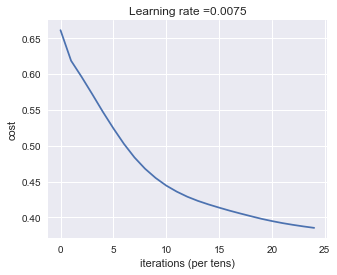

In [22]:
parameters = L_layer_model(X_tr_T, y_tr_T, layers_dims, num_iterations = 2500, print_cost = True)

### The cost function seems to converge fine

In [23]:
# Accuracy on the training set. Does the neural network make a good job on its own data?
pred_train = predict(X_tr_T, y_tr_T, parameters)

Accuracy: 0.842475386779


In [24]:
# Accuracy on the held out test set.
pred_test = predict(X_te_T, y_te_T, parameters)

Accuracy: 0.825842696629


### Training and test prediction accuracy look fine as well. Let's apply this neural network on the test data set and generate predictions.

# Create Kaggle submission

## Read the test data

In [49]:
test = pd.read_csv('datasets/titanic_test.csv')

### Check for missing values

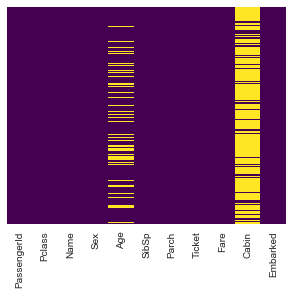

In [50]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Preprocess data - impute age, extract title feature, drop cabin

In [51]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
test.drop('Cabin',axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [52]:
# A list with the all the different titles
titles = sorted(set([x for x in test.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

Different titles found on the dataset:
9 : ['Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev']



In [53]:
# Lets create a new column for the titles
test['Title'] = test['Name'].map(lambda x: get_title(x))

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
test['Title'] = test.apply(replace_titles, axis=1)
test.drop('Name', axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,S,Mrs


## Convert categorical variables

In [54]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
title = pd.get_dummies(test['Title'],drop_first=True)

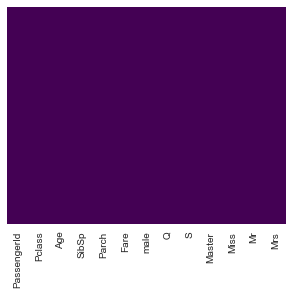

In [55]:
test.drop(['Sex','Embarked','Ticket', 'Title'],axis=1,inplace=True)
test = pd.concat([test,sex,embark,title],axis=1)
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### The test data has only one fare value missing. Let's make an educated guess.

In [56]:
# Assign random value to missing data in fare
test.loc[152,'Fare'] = 7

## Apply Standard Scaler to Age and Fare

In [57]:
from sklearn.preprocessing import StandardScaler
age = test['Age'].values.reshape(418,1)
scaler = StandardScaler()
scaler.fit(age)
scaled_age = scaler.transform(age)
test['Age'] = scaled_age

fare = test['Fare'].values.reshape(418,1)
scaler = StandardScaler()
scaler.fit(fare)
scaled_fare = scaler.transform(fare)
test['Fare'] = scaled_fare

# Apply neural network

In [58]:
X = test.drop(['PassengerId','Master'], axis=1)

## Transpose X

In [59]:
X_tr_T = X.T
X_tr_T.shape

(11, 418)

## Predict survival chance through forward propagation

In [60]:
probas, caches = L_model_forward(X_tr_T, parameters)

### Assign a threshold of 0.5 to transform the probabilities into classes - 0 or 1

In [61]:
p = np.zeros((1,X_tr_T.shape[1]))
for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

In [62]:
p.shape

(1, 418)

# Save predictions

In [63]:
pIds = pd.DataFrame(data=test['PassengerId'], columns=['PassengerId'], dtype=int)

# Transpose the predictions data frame into a column vector
preds = pd.DataFrame(data=p.T, columns=['Survived'], dtype=int)

final_prediction = pd.concat([pIds, preds], axis=1)

In [64]:
final_prediction.to_csv('titanic_survival_zawadzki_jan_predictions.csv', index=False)